In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from df_selector import *
from df_cleaner import *
from df_visualizer import *

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

# Reading Data

In [4]:
file_handler = FileHandler()

In [6]:
# reading the csv file
df = file_handler.read_csv("../data/BrentOilPrices.csv")
df.head(10)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


# General statistics

In [7]:
# number of elements in the df
df.size

18022

In [8]:
df.count()

Date     9011
Price    9011
dtype: int64

In [8]:
df.shape

(9011, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


# Missing Values

In [9]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


In [10]:
missing_df = missing_values_table(df)

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


In [11]:
missing_df

In [12]:
# number of rows with missing values for the whole dataset
count_missing_rows(df)

0 rows(0.0%) contain atleast one missing value.


In [17]:
fix_missing_bfill(df, ['Vol.'])

3 missing values in the column Vol. have been replaced                 using the backward fill method.


In [13]:
percent_missing_values(df)


The dataset contains 0.0 % missing values.


# Data Types

In [14]:
#check if there are columns with mixed data types.
show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [15]:
df.dtypes

Date      object
Price    float64
dtype: object

In [16]:
# get the columns with object data type
string_columns = df.select_dtypes(include='object').columns.tolist()
string_columns

['Date']

In [17]:
convert_to_string(df, string_columns)

In [18]:
convert_to_datetime(df, ['Date'])

In [19]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [20]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


# Duplicates

In [21]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


In [22]:
df.duplicated(subset=['Date']).all()

False

# Feature Engineering

## Aggregate Features

In [23]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,9011,2005-02-10 23:46:53.760958720,1987-05-20 00:00:00,1996-03-20 12:00:00,2005-02-02 00:00:00,2014-01-09 12:00:00,2022-11-14 00:00:00,NaN
Price,9011.0,48.420782,9.1,19.05,38.57,70.09,143.95,32.86011


In [24]:
df['year'] = df['Date'].apply(lambda x: x.year)
df['month'] = df['Date'].apply(lambda x: x.month)
df['day'] = df['Date'].apply(lambda x: x.day)


In [25]:
df.head()

,Date,Price,year,month,day
0,1987-05-20,18.63,1987,5,20
1,1987-05-21,18.45,1987,5,21
2,1987-05-22,18.55,1987,5,22
3,1987-05-25,18.60,1987,5,25
4,1987-05-26,18.63,1987,5,26


# Ubivariate Analysis

In [26]:
plotly_plot_hist(df, 'Price')

In [27]:
plotly_plot_hist(df, 'year')

# Bivariate Analysis

## Price and year

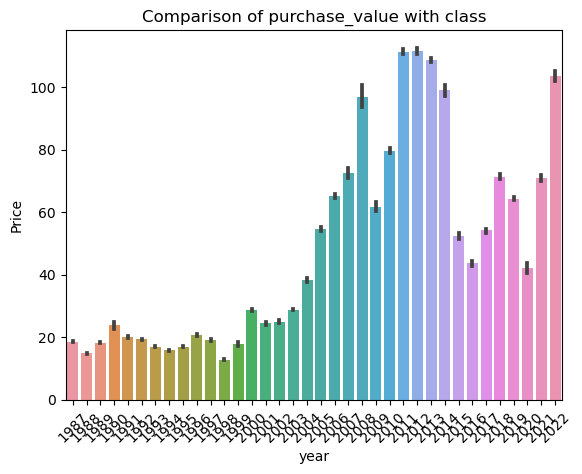

In [28]:

sns.barplot(x='year', y='Price', data=df).set_title('Comparison of purchase_value with class')
plt.xticks(rotation=45)
plt.show()